In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/movie_industry.csv')

In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
df_test = df[:2]

In [5]:
df_test

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [6]:
!pip install networkx==2.8.8
!pip install rdflib==6.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.0 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
nx-cugraph-cu12 24.10.0 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.9 MB/s eta 0:00:00


In [7]:
import networkx as nx
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import RDF, RDFS

In [8]:
# Defining a namespace for the knowledge graph
movie_ns = Namespace("Movie_data/")

# Creating an RDF graph
graph = Graph()

In [9]:
# Iterating through the Test DataFrame and adding triples to the graph
for index, row in df_test.iterrows():
    movie_uri = movie_ns[str(row['name']).replace(" ", "_")]

    graph.add((movie_uri, RDF.type, movie_ns['Movie']))
    graph.add((movie_uri, movie_ns['name'], Literal(row['name'])))
    graph.add((movie_uri, movie_ns['genre'], Literal(row['genre'])))
    graph.add((movie_uri, movie_ns['year'], Literal(row['year'])))
    graph.add((movie_uri, movie_ns['score'], Literal(row['score'])))
    graph.add((movie_uri, movie_ns['director'], Literal(row['director'])))
    graph.add((movie_uri, movie_ns['writer'], Literal(row['writer'])))
    graph.add((movie_uri, movie_ns['star'], Literal(row['star'])))
    graph.add((movie_uri, movie_ns['country'], Literal(row['country'])))
    graph.add((movie_uri, movie_ns['company'], Literal(row['company'])))

In [10]:
# Converting the RDF graph to a NetworkX graph for visualization
nx_graph = nx.Graph()
for s, p, o in graph:
    nx_graph.add_edge(s, o, label=p)

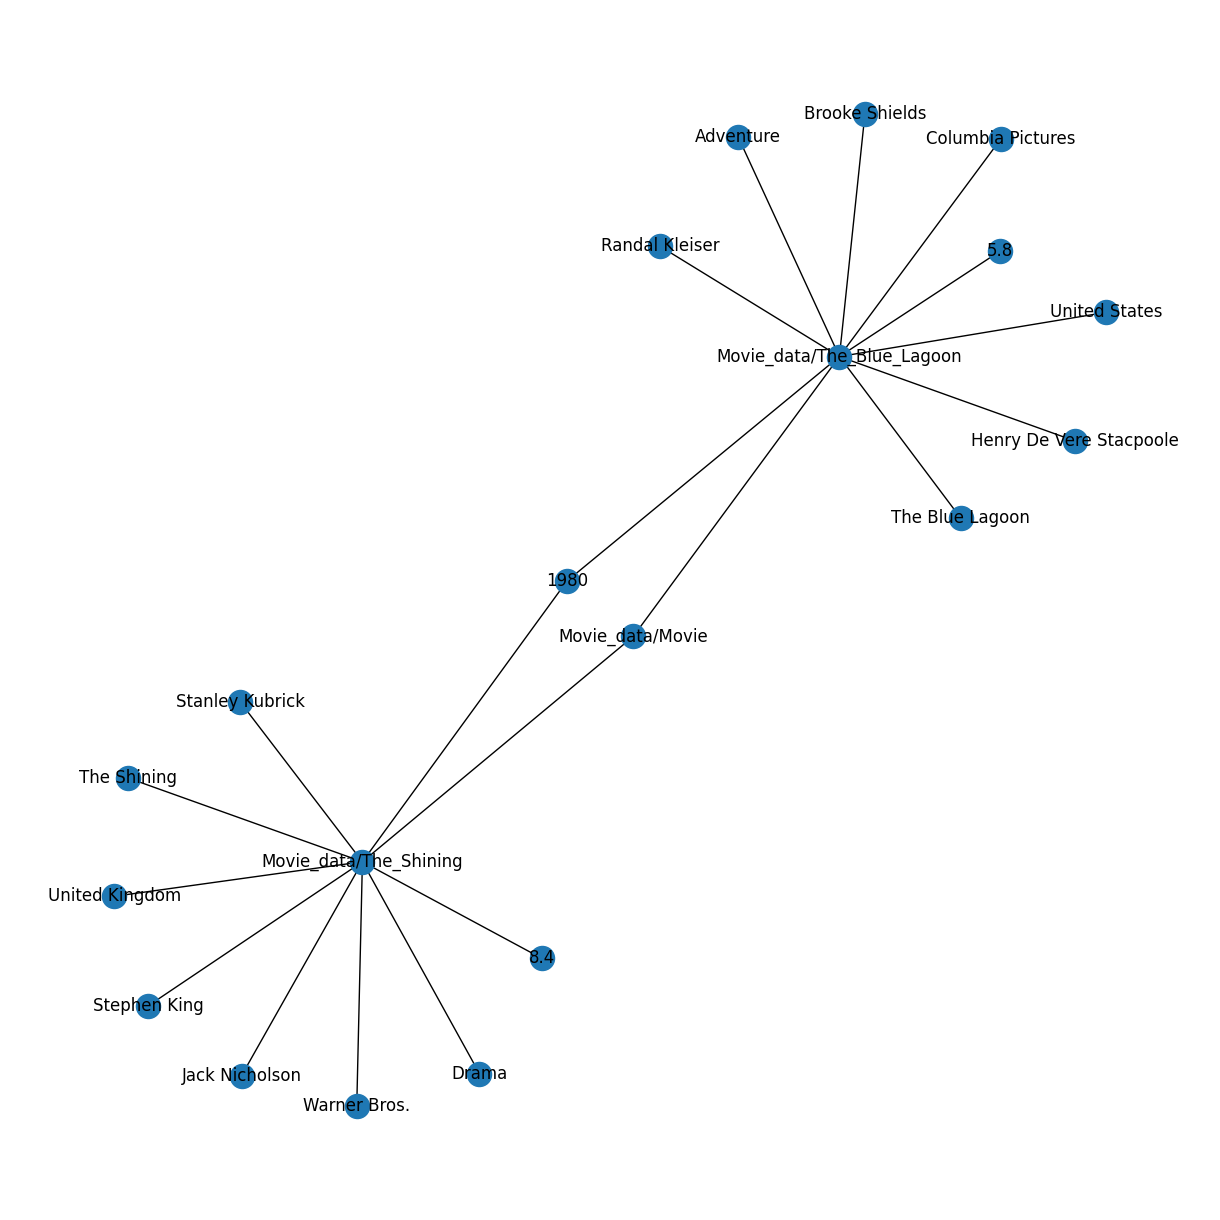

In [11]:
# Visualizing the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(nx_graph, with_labels=True)
plt.show()

In [12]:
# Iterating through the entire DataFrame and adding triples to the graph
for index, row in df.iterrows():
    movie_uri = movie_ns[str(row['name']).replace(" ", "_")]

    graph.add((movie_uri, RDF.type, movie_ns['Movie']))
    graph.add((movie_uri, movie_ns['name'], Literal(row['name'])))
    graph.add((movie_uri, movie_ns['genre'], Literal(row['genre'])))
    graph.add((movie_uri, movie_ns['year'], Literal(row['year'])))
    graph.add((movie_uri, movie_ns['score'], Literal(row['score'])))
    graph.add((movie_uri, movie_ns['director'], Literal(row['director'])))
    graph.add((movie_uri, movie_ns['writer'], Literal(row['writer'])))
    graph.add((movie_uri, movie_ns['star'], Literal(row['star'])))
    graph.add((movie_uri, movie_ns['country'], Literal(row['country'])))
    graph.add((movie_uri, movie_ns['company'], Literal(row['company'])))

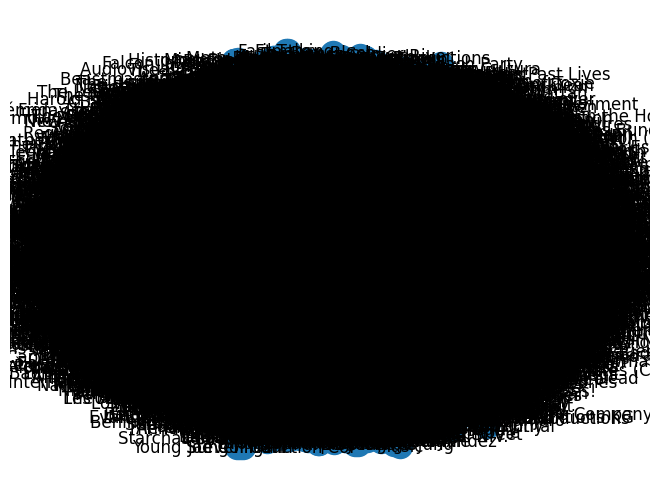

In [13]:
# Converting the RDF graph to a NetworkX graph for visualization
nx_graph = nx.Graph()
for s, p, o in graph:
    nx_graph.add_edge(s, o, label=p)

# Visualizing the graph
import matplotlib.pyplot as plt
nx.draw(nx_graph, with_labels=True)
plt.show()